# matplotlib

### Common imports
The following imports are commonly used for creating plots. The line **%matplotlib inline** causes plots to be output inline, as opposed to popup windows. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # %pylab
import matplotlib as mpl
%matplotlib inline
import seaborn
seaborn.set()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9868\2225180498.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\ProgramData\Ana

## Read Titanic data
Read in the ages of the passengers on the Titanic. This data will be used in some of the example graphs. 

In [2]:
titanic_data = pd.read_csv('../DATA/titanic.csv')
all_ages = titanic_data['age'].dropna().sort_values()
female_ages = titanic_data[titanic_data['sex'] == 'female']['age'].dropna().sort_values()
male_ages = titanic_data[titanic_data['sex'] == 'male']['age'].dropna().sort_values()

## matplotlib.pyplot

**matplotlib.pyplot** is a collection of functions to easily create plots. 

While matplotlib is object-oriented, it creates default objects so you can just call .plot() and related functions without explicitly creating figures, subplots, or axes. It will use the current figure/subplot/axes unless you change them. 

Each pyplot function makes some change to a figure: eg, create a figure, create a plotting area in a figure, plot some lines in a plotting area, decorate the plot with labels, etc.... 

## Simple line plots
If you provide a single list or array to the `plot()` command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. The default x vector has the same length as y but starts with 0, incrementing by 1. Hence the x data in the plot below are [0,1,2,3...97, 98, 99].

Text(0.5, 0, 'other stuff')

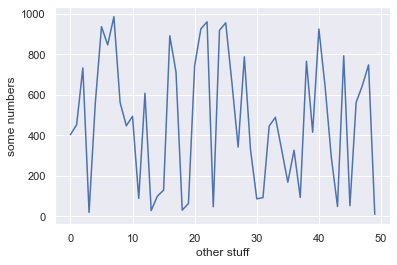

In [16]:
random_values =  np.random.randint(1,1000,50)
plt.plot(random_values)
plt.ylabel('some numbers')
plt.xlabel('other stuff')

## Using `plot()`
`plot()` is a versatile function, and will take an arbitrary number of arguments. For example, to plot x versus y, you can use

    plt.plot(xvalues, yvalues)
    
An optional third argument is a format string, consisting of a color letter, a marker character, and possibly a line style indicator. Beyond the format string, you can also add named arguments to control the style of the plot. Styling details are discussed later in this notebook.

    plt.plot(xvalues, yvalues, "fmt")

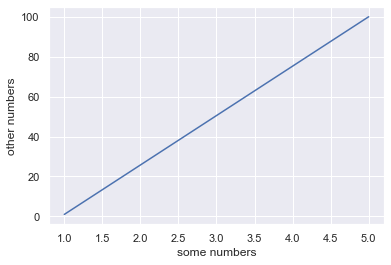

In [4]:
xvals = np.linspace(1.0,5.0,50)
yvals = np.linspace(1,100,50)
plt.plot(xvals, yvals)
plt.xlabel('some numbers')
plt.ylabel('other numbers')
plt.show()

## Scatter plots
`plt.scatter()` creates a scatter plot. Two datasets are needed.

Each plot can have a `label` argument. If the plots have labels, then calling `plt.legend()` will show a legend, using the labels. 

Use `plt.xlabel()` and `plt.ylabel()` can be used to label the axes.

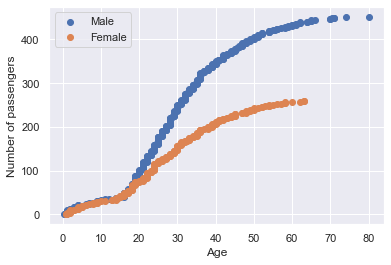

In [5]:
plt.scatter(male_ages, range(len(male_ages)), label="Male")
plt.scatter(female_ages, range(len(female_ages)), label="Female")
plt.ylabel('Number of passengers')
plt.xlabel('Age')
plt.legend()

## Anatomy of a Matplotlib figure

from https://matplotlib.org/2.0.2/faq/usage_faq.html

![Guido](images/anatomy1.png)

## Working with multiple figures and axes
`pyplot` has the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function `.gca()` returns the current axes (a matplotlib.axes.Axes instance), and `.gcf()` returns the current figure (matplotlib.figure.Figure instance). Normally, you don’t have to worry about this, because it is all taken care of behind the scenes. 

## Subplots
To create multiple sets of axes, use `plt.subplot()`. The argements are the number of rows, the number of columns, and the subplot number. Subplots are numbered from left to right, row by row:

|||
|----|----|
|plt.subplot(3,2,1)|plt.subplot(3,2,2)|
|plt.subplot(3,2,3)|plt.subplot(3,2,4)|
|plt.subplot(3,2,5)|plt.subplot(3,2,6)|

Each time you call `plt.subplot()`, subsequent calls to `plt.plot()` will apply to the subplot (axes).

<div class="alert alert-block alert-info">
<b>TIP:</b>Instead of of <code>subplot(1,3,1)</code>, you can use <code>subplot(131)</code>
</div>

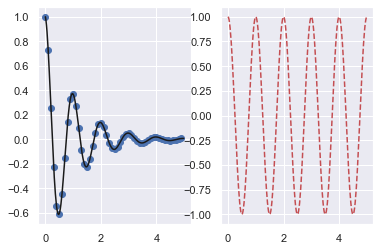

In [6]:
# write a cosine function
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1) # select figure 1
plt.subplot(1, 2, 1)   #  1 row, 2 column, Item #1
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(1, 2, 2)   #  1 rows, 2 column, Item #2
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

plt.savefig('awesome.pdf')

Text(0.5, 1.0, 'Easy as 1,2,3')

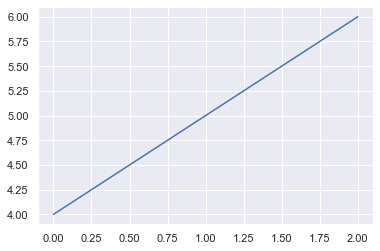

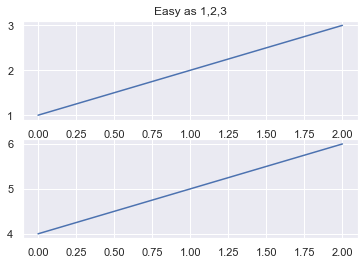

In [7]:
plt.figure(1)                # the first figure
plt.subplot(2,1,1)             # the first subplot in the first figure (rows, cols, curr)
plt.plot([1,2,3])
plt.subplot(212)             # the second subplot in the first figure (rows, cols, curr)
plt.plot([4,5,6])


plt.figure(2)                # a second figure
plt.plot([4,5,6])            # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1,2,3')   # subplot 211 title

More multiple figures. The arguments to add_subplot are (total_rows, total_cols, plot_number). I.e., 3,3,1 is the first cell and 3,3,9 is the last.

[]

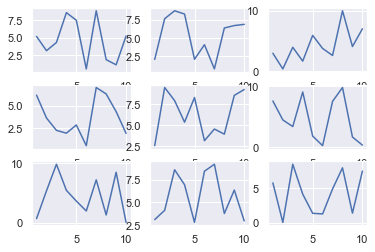

In [8]:
y = np.arange(1,11)
fig = plt.figure()   # get the current figure
for i in range(1,10):
    data = np.random.random_sample((10,)) * 10
    sub = fig.add_subplot(3,3,i)
    sub.plot(y, data)
# fig.savefig('multiplot.pdf', format='pdf')
plt.plot()

## Histograms
We can create a histogram of the ages of all passengers on the Titanic. 
After reading the data, we sort the ages and call `plt.hist()`

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]))

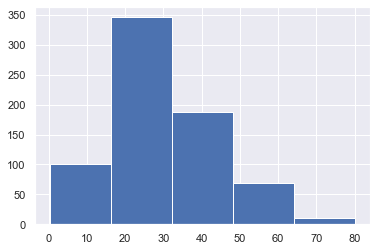

In [18]:

bins = 5
n, bins, patches = plt.hist(all_ages, bins=bins)
n, bins

We can plot male and female passengers separately.

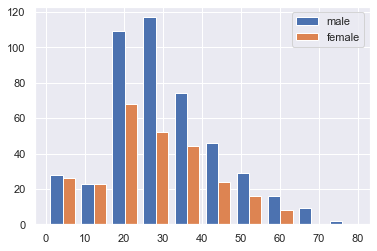

In [10]:
plt.hist([male_ages, female_ages], bins=bins, label=['male', 'female'])
plt.legend()

## Box plots
Use `plt.boxplot()` to create box-and-whisker plots. This function takes a "labels" argument to label each plot, if desired.

<div class="alert alert-block alert-warning">
<b>WARNING:</b>Be sure to remove NA values from your data with <code>dropna()</code> before creating box plots, or you will get missing or empty plots
</div>

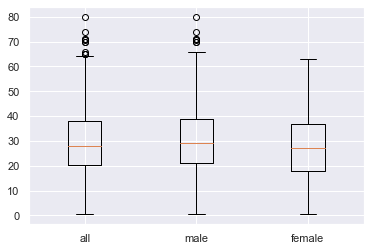

In [11]:
_ = plt.boxplot([all_ages, male_ages, female_ages], labels=['all', 'male', 'female'])

## Working with text
The `text()` command can be used to add text in an arbitrary location, and the `xlabel()`, `ylabel()` and `title()` are used to add text in the 
indicated locations.

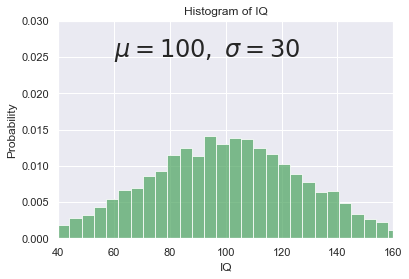

In [12]:
mu, sigma = 100, 30
data = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x=data, bins=50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('IQ')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu={},\ \sigma={}$'.format(mu, sigma), fontsize=24)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

## Annotations
A common use case of text is to annotate some feature of the plot, and the `annotate()` method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

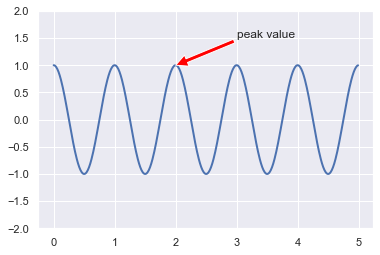

In [13]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('peak value', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='red'),
            )

plt.ylim(-2,2)
plt.savefig('annotation.pdf')
plt.show()


## Pie chart (just for fun)
Use `plt.pie()`, pass in data + config options. You can set which slices 'explode', or pop out, and set the colors individually. 

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/piechart.pdf'

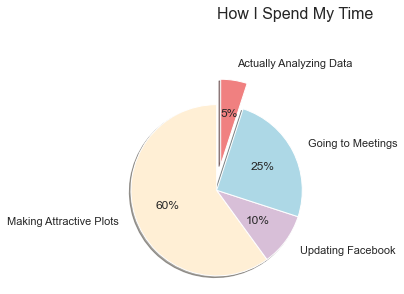

In [14]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'Making Attractive Plots', 'Updating Facebook', 'Going to Meetings', 'Actually Analyzing Data'
sizes = [60, 10, 25, 5]
colors = ['papayawhip', 'thistle', 'lightblue', 'lightcoral']
explode = (0, 0, 0, 0.3) # make 4th slice 'explode'

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.0f%%', shadow=True, startangle=90, labeldistance=1.2)
# Set axis (aspect ratio) to 'equal' so pie is drawn flat
plt.axis('equal')
plt.text(0, 2, "How I Spend My Time", fontsize=16)
#plt.show()
plt.savefig('/tmp/piechart.pdf', format='pdf')

<!-- 
TODO:
Add more plot types
-->

## Styling plots
The optional third argument to `plt.plot()` sets the color and marker type. The letters and symbols of the format string originated with MATLAB. 

Concatenate a color string with a line style string. The default format string is ‘b-‘, which is a solid blue line.

You can also use keyword arguments to specify the plot style. Example: 

    plt.plot(x,y,color='red',linewidth=2.0)

Format strings and keyword arguments can be used together. 

### Markers

{0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 'D': 'diamond', 6: 'caretup', 7: 'caretdown', 's': 'square', 
'|': 'vline', '': 'nothing', 'None': 'nothing', 'x': 'x', 5: 'caretright', '_': 'hline', '^': 'triangle_up', ' ': 'nothing', 
'd': 'thin_diamond', None: 'nothing', 'h': 'hexagon1', '+': 'plus', '*': 'star', ',': 'pixel', 'o': 'circle', '.': 'point', '1': 
'tri_down', 'p': 'pentagon', '3': 'tri_left', '2': 'tri_up', '4': 'tri_right', 'H': 'hexagon2', 'v': 'triangle_down', '8': 'octagon', 
'<': 'triangle_left', '>': 'triangle_right'}

### Colors

* b: blue
* g: green
* r: red
* c: cyan
* m: magenta
* y: yellow
* k: black
* w: white

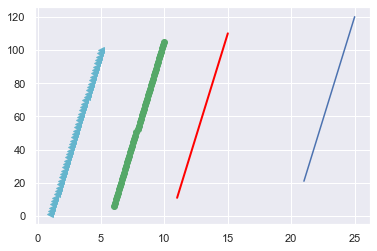

In [19]:
plt.plot(xvals, yvals, 'c<')
plt.plot(xvals + 5, yvals + 5, 'go')
plt.plot(xvals + 10, yvals + 10, color='red', linewidth=2)
plt.savefig('wombat.png')
plt.plot(xvals + 20, yvals + 20)
plt.show()